In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data and creating the data frame

url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'
insurancefraud_df = pd.read_csv(url, sep=',')
insurancefraud_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# Shape of the data frame, 1000 shows number of rows and 40 shows number of columns

insurancefraud_df.shape

(1000, 40)

In [4]:
# Unique values in each column

insurancefraud_df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [5]:
# Statstical Analysis of the data frame

insurancefraud_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [6]:
# Datatypes of the dataframe

insurancefraud_df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
# Calcuating null values in the data

insurancefraud_df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

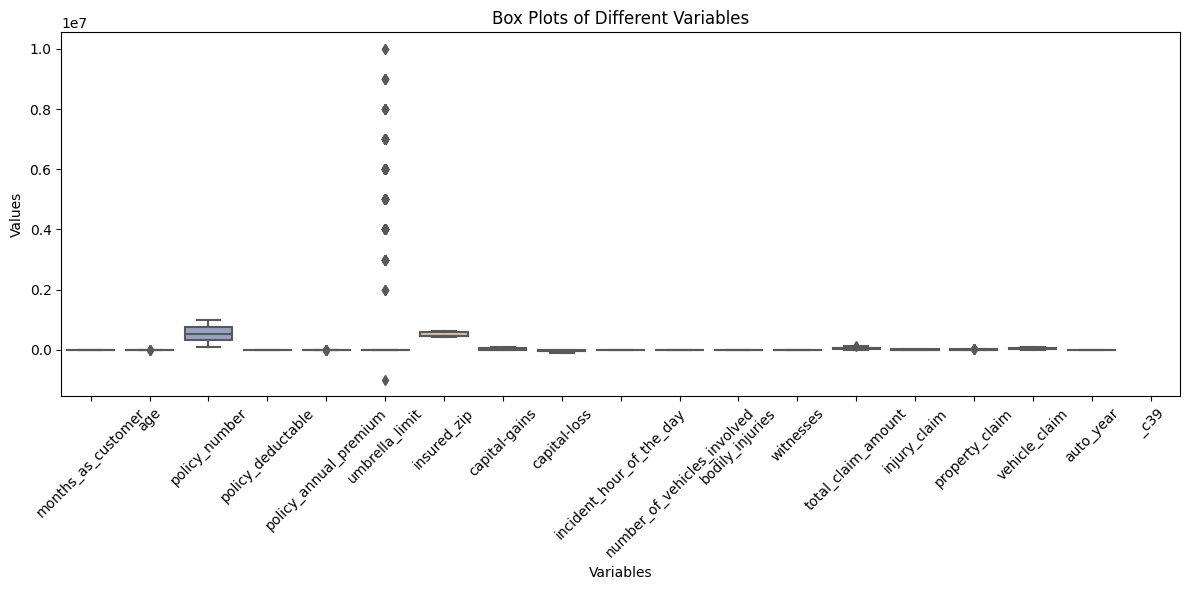

In [8]:
# Box plots for the dataframe

plt.figure(figsize=(12, 6))
sns.boxplot(data=insurancefraud_df, orient='v', palette='Set2')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots of Different Variables')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

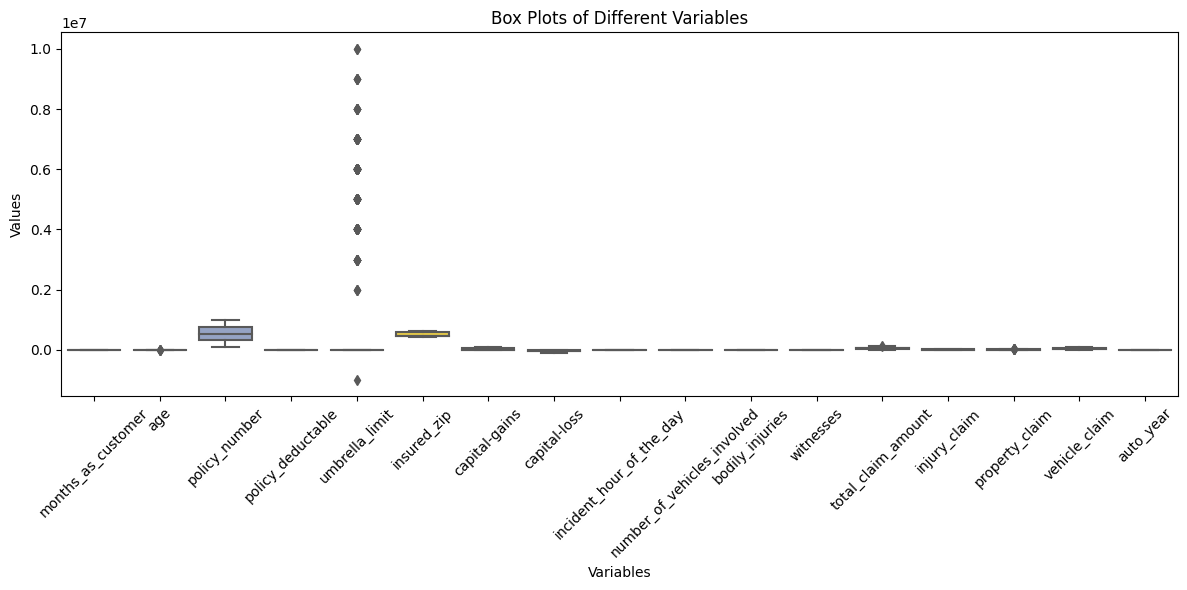

In [9]:
# Dropping two columns with very varied datapoints and _c39 column as well, as it has only null values

insurancefraud_df.drop(['policy_annual_premium', '_c39'], axis=1, inplace = True)

# Again box plots for the dataframe

plt.figure(figsize=(12, 6))
sns.boxplot(data=insurancefraud_df, orient='v', palette='Set2')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots of Different Variables')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

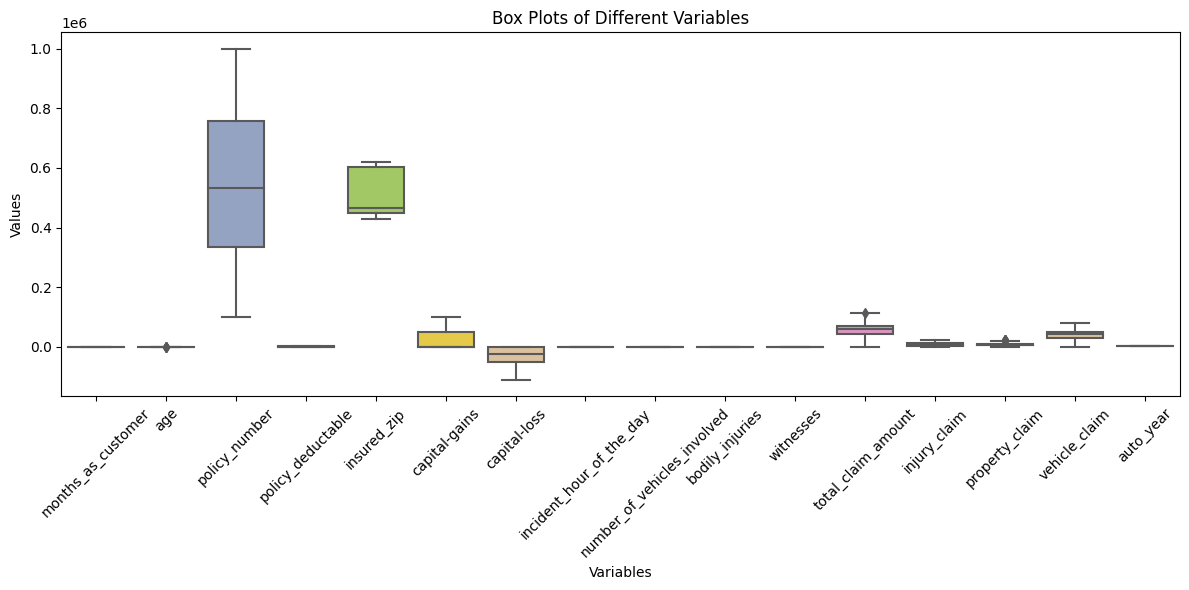

In [10]:
# Dropping umbrella_limit and then plotting box plots

insurancefraud_df.drop(['umbrella_limit'], axis=1, inplace = True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=insurancefraud_df, orient='v', palette='Set2')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots of Different Variables')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

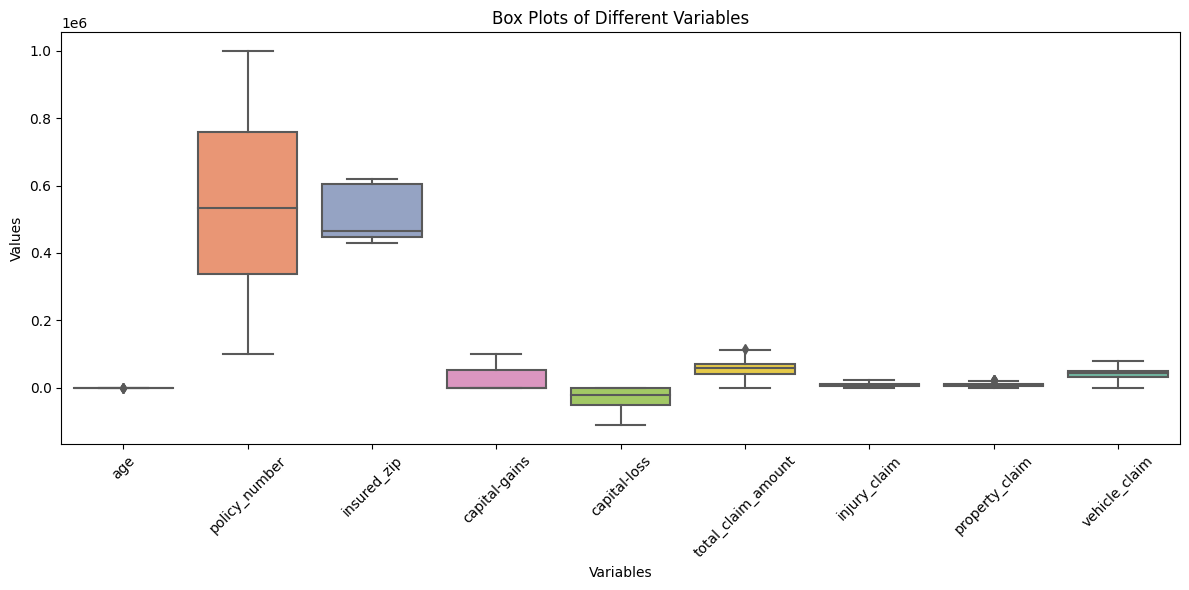

In [11]:
# Dropping columns of those values are close to Zero (0) and then plotting box plots

insurancefraud_df.drop(['months_as_customer', 'policy_deductable', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_year'], axis=1, inplace = True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=insurancefraud_df, orient='v', palette='Set2')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots of Different Variables')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [12]:
# Building the correlation matrix

corrs = insurancefraud_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

# Model Building - Predicting "fraud_reported"

In [14]:
# Dropping non-important columns (The decision of choosing of these columns is made after looking at the correlation matrix above which shows the correlation coefficients)

insurancefraud_df.drop(['policy_bind_date', 'insured_zip', 'incident_date', 'incident_location', 'auto_make', 'auto_model'], axis=1, inplace = True)

In [15]:
# Convert categorical columns into dummy variables

insurancefraud_df = pd.get_dummies(insurancefraud_df, columns=['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies',
                                                               'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state',
                                                               'incident_city', 'property_damage', 'police_report_available'], drop_first=True)

In [16]:
# Shape of the dataframe for building model

insurancefraud_df.shape

(1000, 86)

In [17]:
# Extracting the independent and dependent variables

X = insurancefraud_df.drop('fraud_reported', axis=1)
y = insurancefraud_df['fraud_reported']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [19]:
# Create a logistic regression model

lr = LogisticRegression(solver='newton-cg', C=100, penalty='l2', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='balanced', solver='newton-cg')

In [20]:
# Predictions

y_pred = lr.predict(X_test)
y_pred

array(['N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N

In [21]:
# Calculate evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

Accuracy: 0.84
ROC AUC: 0.8585069444444444
